## Report assignment

In [1]:
#Import the necessary packages!
import pandas as pd
import seaborn as sns
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from time import time
import os
from math import sqrt

#All the fun ML bits
#First we get the general bits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#The modelling bits
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
import xgboost as xgb
#from fbprophet import Prophet
import warnings

warnings.filterwarnings('ignore')

In [76]:
#Import data
store = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S2/Data and its Env/Assignment/store.csv")
test = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S2/Data and its Env\Assignment/test(1).csv")
train = pd.read_csv("C:/Users/gyrmo/Documents/Assignments/Y1 S2/Data and its Env/Assignment/train(2).csv")

In [3]:
#Check the head
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [4]:
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [5]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [6]:
#Summary?
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store          41088 non-null  int64  
 1   DayOfWeek      41088 non-null  int64  
 2   Date           41088 non-null  object 
 3   Sales          0 non-null      float64
 4   Customers      0 non-null      float64
 5   Open           41077 non-null  float64
 6   Promo          41088 non-null  int64  
 7   StateHoliday   41088 non-null  object 
 8   SchoolHoliday  41088 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 2.8+ MB


In [9]:
#Confirm null values
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [10]:
store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [12]:
test.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,0.0,0.0,41077.000000,41088.000000,41088.000000
mean,555.899533,3.979167,NaN,NaN,0.854322,0.395833,0.443487
std,320.274496,2.015481,NaN,NaN,0.352787,0.489035,0.496802
min,1.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,279.750000,2.000000,NaN,NaN,1.000000,0.000000,0.000000
50%,553.500000,4.000000,NaN,NaN,1.000000,0.000000,0.000000
75%,832.250000,6.000000,NaN,NaN,1.000000,1.000000,1.000000
max,1115.000000,7.000000,NaN,NaN,1.000000,1.000000,1.000000


In [13]:
train.nunique()

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64

In [14]:
test.nunique()

Store            856
DayOfWeek          7
Date              48
Sales              0
Customers          0
Open               2
Promo              2
StateHoliday       2
SchoolHoliday      2
dtype: int64

In [15]:
#Graphs?
store_vals = store[['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
                    'Promo2SinceWeek','Promo2SinceYear']]

In [16]:
#Check
store_vals.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,1270.0,9.0,2008.0,0,NaN,NaN
1,2,570.0,11.0,2007.0,1,13.0,2010.0
2,3,14130.0,12.0,2006.0,1,14.0,2011.0
3,4,620.0,9.0,2009.0,0,NaN,NaN
4,5,29910.0,4.0,2015.0,0,NaN,NaN


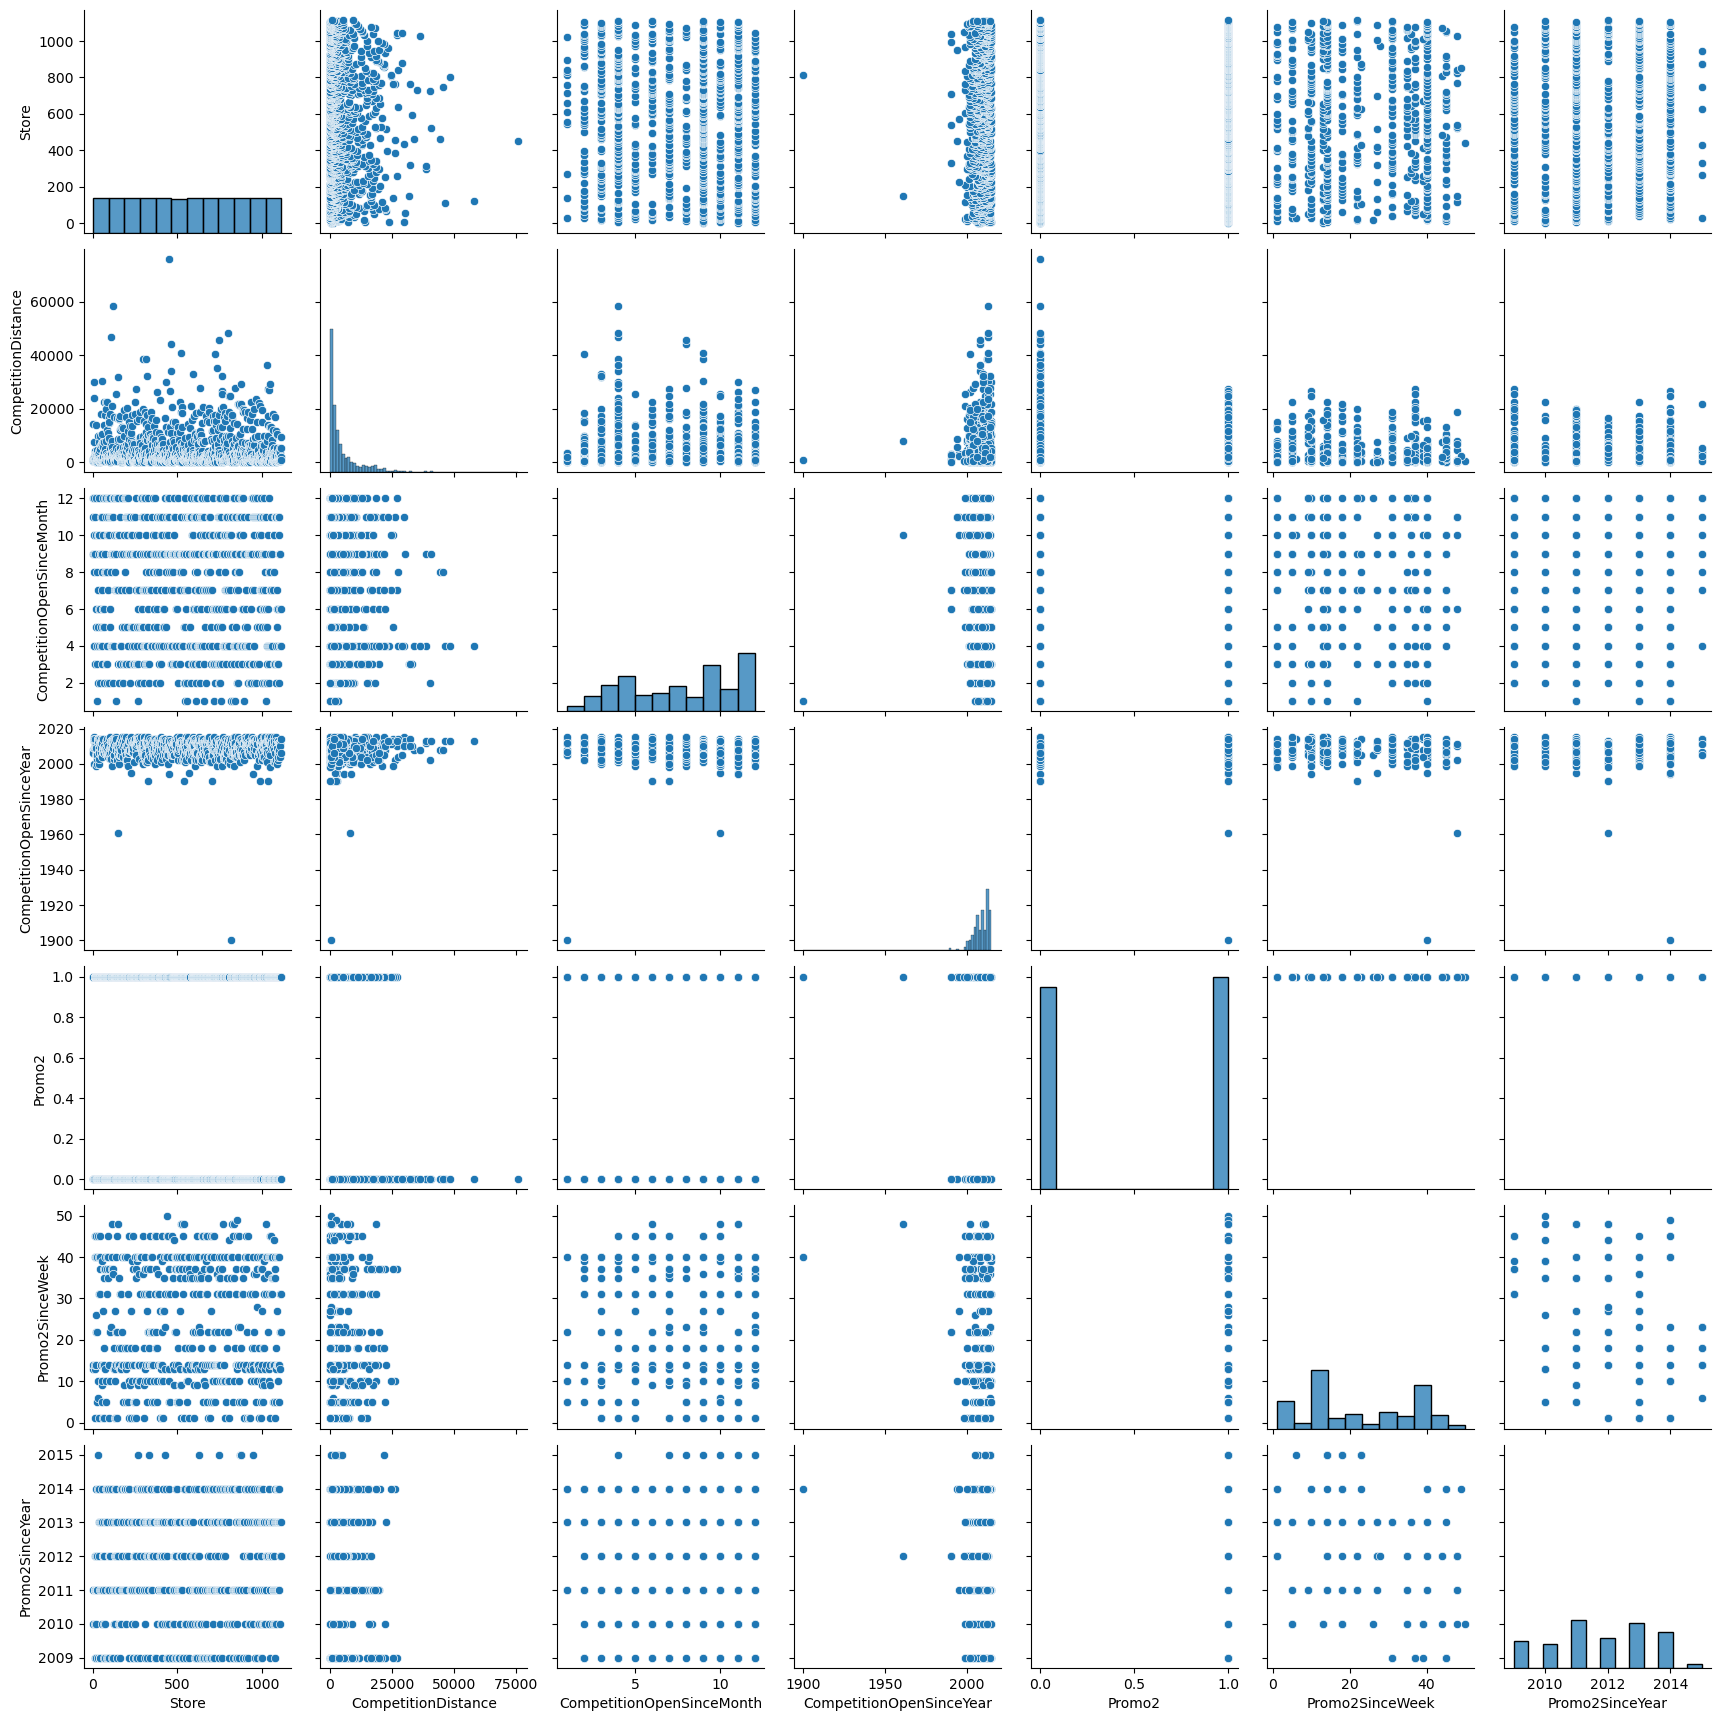

In [17]:
#Plot distribution 
sns.pairplot(store_vals)

<Axes: xlabel='Promo2', ylabel='CompetitionDistance'>

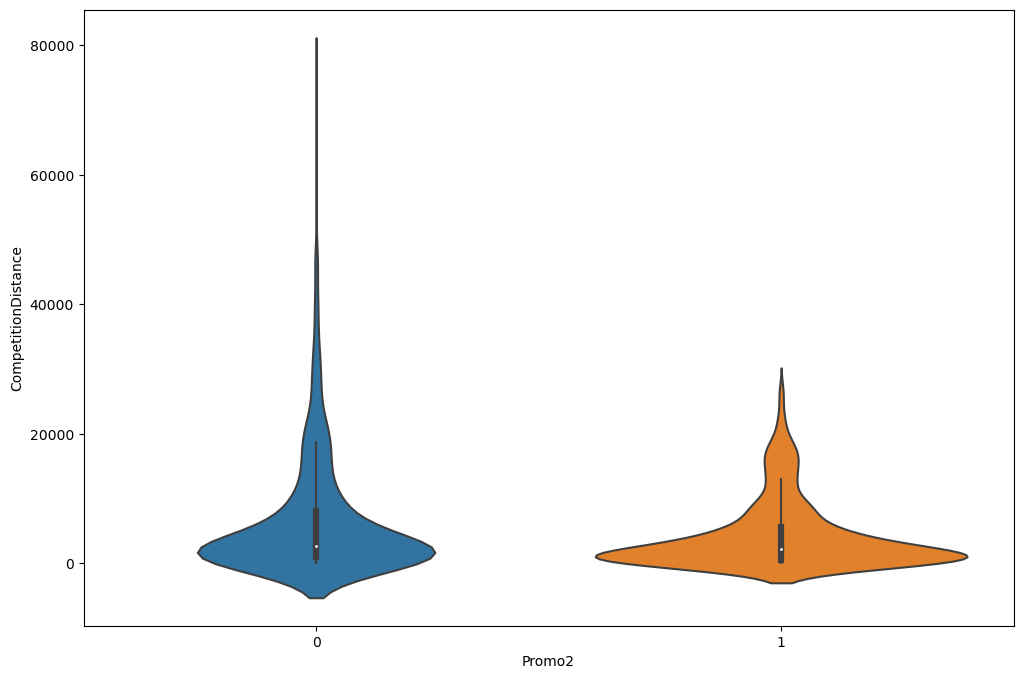

In [18]:
f, ax = plt.subplots(1, figsize=(12, 8))
sns.violinplot(data=store_vals, x='Promo2', y='CompetitionDistance')

In [19]:
store_vals.corr()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.027220,-0.050319,-0.004648,0.007486,0.007584,0.039640
CompetitionDistance,-0.027220,1.000000,-0.059126,0.025124,-0.145717,-0.060552,-0.109504
CompetitionOpenSinceMonth,-0.050319,-0.059126,1.000000,-0.052250,-0.011485,-0.035504,0.047815
CompetitionOpenSinceYear,-0.004648,0.025124,-0.052250,1.000000,-0.076520,-0.079984,0.006354
Promo2,0.007486,-0.145717,-0.011485,-0.076520,1.000000,NaN,NaN
Promo2SinceWeek,0.007584,-0.060552,-0.035504,-0.079984,NaN,1.000000,-0.217650
Promo2SinceYear,0.039640,-0.109504,0.047815,0.006354,NaN,-0.217650,1.000000


<Axes: >

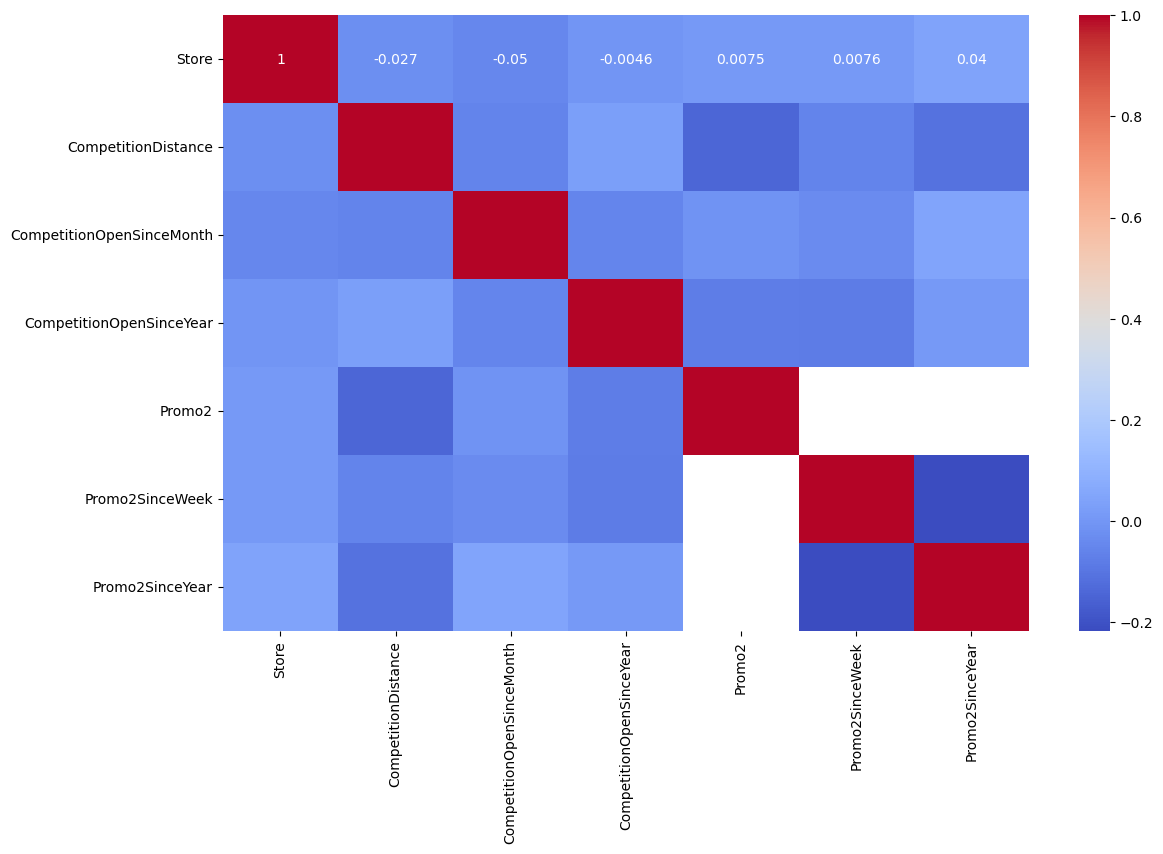

In [20]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(store_vals.corr(),cmap='coolwarm',annot=True)

In [21]:
#First clean the store data and move
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
#The best way to deal with the missing values would be mean imputation
mean_distance = store['CompetitionDistance'].mean()
store['CompetitionDistance'] = store['CompetitionDistance'].fillna(mean_distance)

In [28]:
#Fill na values in the Promo2 adjacent values with 0 to take care of that
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].fillna(0)
store['Promo2SinceYear'] = store['Promo2SinceYear'].fillna(0)
store['PromoInterval'] = store['PromoInterval'].fillna(0)

In [24]:
#Check
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [25]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [26]:
#Drop it like it's hot
store = store.drop(columns=['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'])

In [48]:
#Convert to int
store['Promo2SinceWeek'] = store['Promo2SinceWeek'].astype('int64')
store['Promo2SinceYear'] = store['Promo2SinceYear'].astype('int64')
store['CompetitionDistance'] = store['CompetitionDistance'].astype('int64')
#ALWAYS CONVERT TO INT BEFORE DATE TIME MANIPULATIONS
#Competition distance has been left as is

In [49]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_date,Week_Promo,Year_Promo
0,1,c,a,1270,0,0,0,0,0,0,0
1,2,a,a,570,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29 00:00:00,13,2010
2,3,a,a,14130,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04 00:00:00,14,2011
3,4,c,c,620,0,0,0,0,0,0,0
4,5,a,a,29910,0,0,0,0,0,0,0


In [54]:
#Convert to date time
#Convery the date times because they'll read as unimaginable horrors
store['start_date'] = pd.to_datetime(store['Promo2SinceYear'].astype(str) + store['Promo2SinceWeek'].astype(str) + '1', format='%Y%W%w', errors='coerce')

In [55]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_date,Week_Promo,Year_Promo
0,1,c,a,1270,0,0,0,0,NaT,0,0
1,2,a,a,570,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29,13,2010
2,3,a,a,14130,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04,14,2011
3,4,c,c,620,0,0,0,0,NaT,0,0
4,5,a,a,29910,0,0,0,0,NaT,0,0


In [43]:
#Convery the date times because they'll read as unimaginable horrors
store['Week_Promo'] = store['start_date'].dt.isocalendar().week
store['Year_Promo'] = store['start_date'].dt.isocalendar().year

In [45]:
store.isna().sum()

Store                    0
StoreType                0
Assortment               0
CompetitionDistance      0
Promo2                   0
Promo2SinceWeek          0
Promo2SinceYear          0
PromoInterval            0
start_date             544
Week_Promo             544
Year_Promo             544
dtype: int64

In [47]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_date,Week_Promo,Year_Promo
0,1,c,a,1270.0,0,0,0,0,0,0,0
1,2,a,a,570.0,1,13,2010,"Jan,Apr,Jul,Oct",2010-03-29 00:00:00,13,2010
2,3,a,a,14130.0,1,14,2011,"Jan,Apr,Jul,Oct",2011-04-04 00:00:00,14,2011
3,4,c,c,620.0,0,0,0,0,0,0,0
4,5,a,a,29910.0,0,0,0,0,0,0,0


In [46]:
store['start_date'] = store['start_date'].fillna(0)
store['Week_Promo'] = store['Week_Promo'].fillna(0)
store['Year_Promo'] = store['Year_Promo'].fillna(0)
#Eliminate the No time values

In [50]:
#Clean output export
store.to_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_store_data.csv')

In [78]:
#REad in clean untainted data
clean_store = pd.read_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_store_data.csv')

In [79]:
#Train
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1


In [80]:
#Make sure it's date time
train['Date'] = pd.to_datetime(train['Date'])

In [81]:
#Add in the week and the month as individual columns
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['WeekOfYear'] = train['Date'].dt.isocalendar().week

In [82]:
#Duplicate and Boolean
train['StateHoliday_Bool'] = train['StateHoliday'].copy()

In [88]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,StateHoliday_Bool
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1


In [84]:
#REplace in state holiday
train['StateHoliday'] = train['StateHoliday'].replace('0','d')

In [86]:
#REplace in state holiday
train['StateHoliday_Bool'] = train['StateHoliday_Bool'].replace(['a','b','c'],'1')

In [89]:
#Ensure that it's as type bool
train['StateHoliday_Bool'] = train['StateHoliday_Bool'].astype('int64')

In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Store              1017209 non-null  int64         
 1   DayOfWeek          1017209 non-null  int64         
 2   Date               1017209 non-null  datetime64[ns]
 3   Sales              1017209 non-null  int64         
 4   Customers          1017209 non-null  int64         
 5   Open               1017209 non-null  int64         
 6   Promo              1017209 non-null  int64         
 7   StateHoliday       1017209 non-null  object        
 8   SchoolHoliday      1017209 non-null  int64         
 9   Year               1017209 non-null  int32         
 10  Month              1017209 non-null  int32         
 11  WeekOfYear         1017209 non-null  UInt32        
 12  StateHoliday_Bool  1017209 non-null  int64         
dtypes: UInt32(1), datetime64[ns

In [92]:
#Clean output export
train.to_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_train_data.csv')

In [93]:
#REad in clean untainted data
clean_train = pd.read_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_train_data.csv')

In [94]:
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0


In [95]:
#Make sure it's date time
test['Date'] = pd.to_datetime(train['Date'])

In [96]:
#Add in the week and the month as individual columns
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['WeekOfYear'] = test['Date'].dt.isocalendar().week

In [97]:
#Duplicate and Boolean
test['StateHoliday_Bool'] = test['StateHoliday'].copy()

In [101]:
test.head(20)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,StateHoliday_Bool
0,1,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
1,3,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
2,7,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
3,8,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
4,9,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
5,10,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
6,11,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
7,12,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
8,13,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
9,14,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0


In [108]:
test.loc[test['StateHoliday']=='a']
#Checks for a

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,StateHoliday_Bool


In [105]:
#REplace in state holiday
test['StateHoliday'] = test['StateHoliday'].replace('a','1')

In [106]:
#REplace in state holiday
test['StateHoliday_Bool'] = test['StateHoliday_Bool'].replace('a','1')

In [107]:
#Ensure that it's as type bool
test['StateHoliday_Bool'] = test['StateHoliday_Bool'].astype('int64')
test['StateHoliday'] = test['StateHoliday'].astype('int64')

In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Store              41088 non-null  int64         
 1   DayOfWeek          41088 non-null  int64         
 2   Date               41088 non-null  datetime64[ns]
 3   Sales              0 non-null      float64       
 4   Customers          0 non-null      float64       
 5   Open               41077 non-null  float64       
 6   Promo              41088 non-null  int64         
 7   StateHoliday       41088 non-null  int64         
 8   SchoolHoliday      41088 non-null  int64         
 9   Year               41088 non-null  int32         
 10  Month              41088 non-null  int32         
 11  WeekOfYear         41088 non-null  UInt32        
 12  StateHoliday_Bool  41088 non-null  int64         
dtypes: UInt32(1), datetime64[ns](1), float64(3), int32(2), int64(

In [110]:
#Final check
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,WeekOfYear,StateHoliday_Bool
0,1,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
1,3,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
2,7,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
3,8,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0
4,9,4,2015-07-31,NaN,NaN,1.0,1,0,0,2015,7,31,0


In [111]:
#Clean output export
test.to_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_test_data.csv')

In [112]:
#REad in clean untainted data
clean_test = pd.read_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/clean_test_data.csv')

In [113]:
#Merge the train and store datasets
updated_training = pd.merge(clean_train, clean_store, how='inner', on='Store')

In [118]:
#Check
updated_training.head().T

,0,1,2,3,4
Unnamed: 0_x,0,1115,2230,3345,4460
Store,1,1,1,1,1
DayOfWeek,5,4,3,2,1
Date,2015-07-31,2015-07-30,2015-07-29,2015-07-28,2015-07-27
Sales,5263,5020,4782,5011,6102
Customers,555,546,523,560,612
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,d,d,d,d,d
SchoolHoliday,1,1,1,1,1


In [116]:
updated_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Unnamed: 0_x         1017209 non-null  int64 
 1   Store                1017209 non-null  int64 
 2   DayOfWeek            1017209 non-null  int64 
 3   Date                 1017209 non-null  object
 4   Sales                1017209 non-null  int64 
 5   Customers            1017209 non-null  int64 
 6   Open                 1017209 non-null  int64 
 7   Promo                1017209 non-null  int64 
 8   StateHoliday         1017209 non-null  object
 9   SchoolHoliday        1017209 non-null  int64 
 10  Year                 1017209 non-null  int64 
 11  Month                1017209 non-null  int64 
 12  WeekOfYear           1017209 non-null  int64 
 13  StateHoliday_Bool    1017209 non-null  int64 
 14  Unnamed: 0_y         1017209 non-null  int64 
 15  StoreType      

In [119]:
#Drop the sus columns
updated_training = updated_training.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'])

In [120]:
#Info
updated_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Store                1017209 non-null  int64 
 1   DayOfWeek            1017209 non-null  int64 
 2   Date                 1017209 non-null  object
 3   Sales                1017209 non-null  int64 
 4   Customers            1017209 non-null  int64 
 5   Open                 1017209 non-null  int64 
 6   Promo                1017209 non-null  int64 
 7   StateHoliday         1017209 non-null  object
 8   SchoolHoliday        1017209 non-null  int64 
 9   Year                 1017209 non-null  int64 
 10  Month                1017209 non-null  int64 
 11  WeekOfYear           1017209 non-null  int64 
 12  StateHoliday_Bool    1017209 non-null  int64 
 13  StoreType            1017209 non-null  object
 14  Assortment           1017209 non-null  object
 15  CompetitionDist

In [121]:
#Final one before more investigation
updated_training.to_csv('C:/Users/gyrmo/OneDrive - University of Leeds/Assignment Data/Report_Assignment/updated_training_data_with_store.csv')

In [123]:
updated_training.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,start_date,Week_Promo,Year_Promo
0,1,5,2015-07-31,5263,555,1,1,d,1,2015,...,c,a,1270,0,0,0,0,0,0,0
1,1,4,2015-07-30,5020,546,1,1,d,1,2015,...,c,a,1270,0,0,0,0,0,0,0
2,1,3,2015-07-29,4782,523,1,1,d,1,2015,...,c,a,1270,0,0,0,0,0,0,0
3,1,2,2015-07-28,5011,560,1,1,d,1,2015,...,c,a,1270,0,0,0,0,0,0,0
4,1,1,2015-07-27,6102,612,1,1,d,1,2015,...,c,a,1270,0,0,0,0,0,0,0


In [124]:
updated_training_vals = updated_training[['Store','Sales','Customers','Open','Promo','SchoolHoliday','Year','Month',
                                          'WeekOfYear','StateHoliday_Bool','CompetitionDistance','Promo2','Promo2SinceWeek','Promo2SinceYear',
                                          'Week_Promo','Year_Promo']]

In [125]:
updated_training_vals.corr()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,WeekOfYear,StateHoliday_Bool,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,Week_Promo,Year_Promo
Store,1.000000,0.005126,0.024325,-0.000047,0.000058,0.000641,0.000290,0.001467,0.001421,0.000542,-0.026394,0.008488,0.011053,0.008520,0.011088,0.008520
Sales,0.005126,1.000000,0.894711,0.678472,0.452345,0.085124,0.023519,0.048768,0.052946,-0.254216,-0.019207,-0.091040,-0.044143,-0.091056,-0.044960,-0.091056
Customers,0.024325,0.894711,1.000000,0.616768,0.316169,0.071568,-0.001212,0.038179,0.041404,-0.226608,-0.102776,-0.150159,-0.098323,-0.150138,-0.099396,-0.150138
Open,-0.000047,0.678472,0.616768,1.000000,0.295042,0.086171,-0.001009,-0.000681,0.004792,-0.378378,0.007981,-0.008309,-0.007436,-0.008308,-0.007458,-0.008308
Promo,0.000058,0.452345,0.316169,0.295042,1.000000,0.067483,0.024300,-0.011747,0.000572,-0.012353,0.000138,-0.000983,-0.001210,-0.000983,-0.001210,-0.000983
SchoolHoliday,0.000641,0.085124,0.071568,0.086171,0.067483,1.000000,-0.036535,0.103282,0.071052,0.148651,-0.003684,-0.006909,-0.006679,-0.006912,-0.006676,-0.006912
Year,0.000290,0.023519,-0.001212,-0.001009,0.024300,-0.036535,1.000000,-0.269382,-0.256619,0.006074,0.000702,-0.004982,-0.006135,-0.004983,-0.006137,-0.004983
Month,0.001467,0.048768,0.038179,-0.000681,-0.011747,0.103282,-0.269382,1.000000,0.967034,-0.000794,0.003574,-0.025323,-0.031188,-0.025329,-0.031198,-0.025329
WeekOfYear,0.001421,0.052946,0.041404,0.004792,0.000572,0.071052,-0.256619,0.967034,1.000000,-0.002655,0.003460,-0.024516,-0.030194,-0.024522,-0.030203,-0.024522
StateHoliday_Bool,0.000542,-0.254216,-0.226608,-0.378378,-0.012353,0.148651,0.006074,-0.000794,-0.002655,1.000000,-0.000784,0.008932,0.008796,0.008933,0.008855,0.008933


<Axes: >

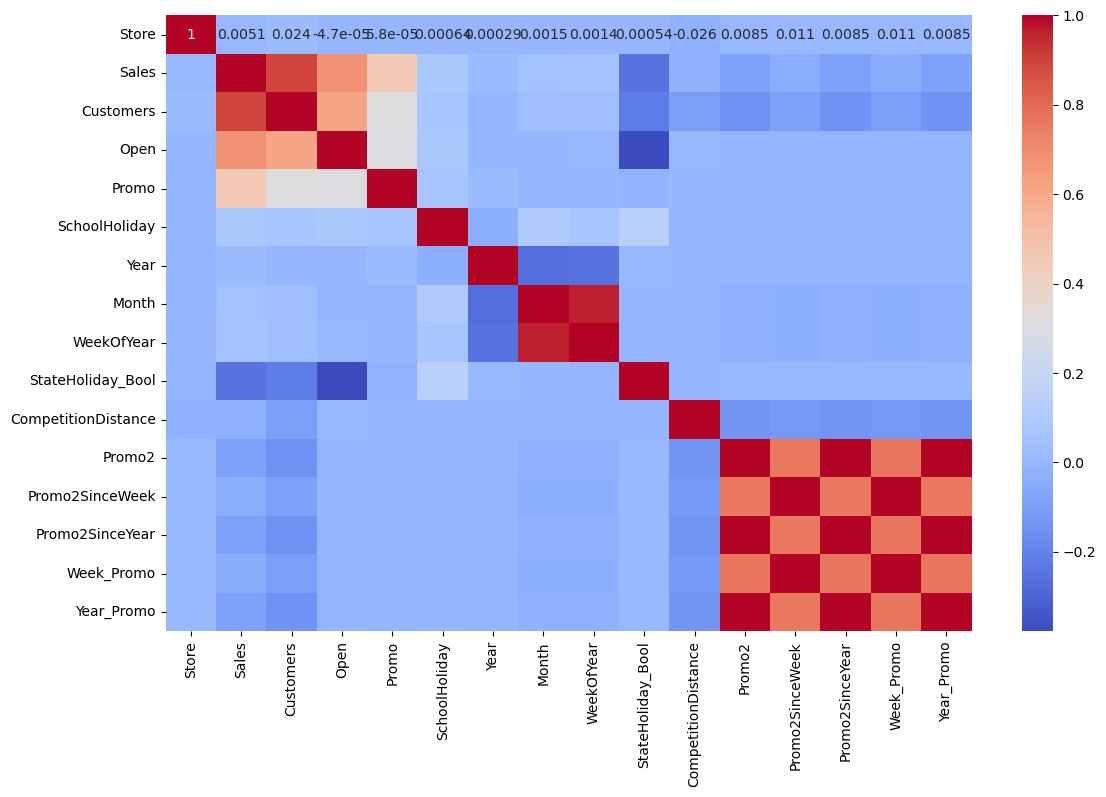

In [126]:
fig = plt.figure(figsize = (13,8))
sns.heatmap(updated_training_vals.corr(),cmap='coolwarm',annot=True)